# Value at Risk

O Value at Risk (ou simplesmente Var) é um indicador estatístico de risco, usado para quantificar a **probabilidade** de ocorrência de um _Máximo Drawdown_ de um ativo ou portfólio, dado um nível de confiança e um intervalo de tempo determinados. O VaR é um dos principais métodos usados para gestão de riscos em fundos de investimentos e outras instituições financeiras, principalmente para casos que envolvam _operações alavancadas_. 

**Exemplo:** Dado um intervalo de confiança de 95%, o VaR obtido é de R$ 100.000,00 para os próximos 7 dias.

Existem dois tipos diferentes de VaR, o **Paramétrico** e o **Não Paramétrico**, diferenciados apenas pelos métodos de cálculo. O VaR Paramétrico possui este nome pois se baseia na aproximação de alguma distribuição estatística já existente, enquanto que o Não Paramétrico por usa vez não realiza esse tipo de aproximação. 

Este projeto tem como objetivo trabalhar (primeiramente) o VaR **Paramétrico**, mais especificamente pelo método **Variância-Covariância**, que aproxima os resultados de uma distribuição normal, conforme demonstrado na imagem abaixo.

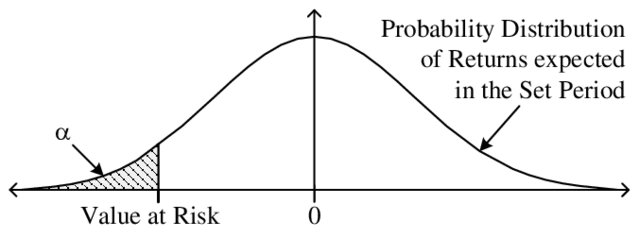

#### **Etapas do projeto:** <br>
1) Calcular retornos periódicos dos ativos selecionados <br>
2) Calcular matriz de covariância <br>
3) Calcular média e desvio padrão do portfolio <br>
4) Calcular aproximação da distribuição normal com um interalo de confiança, desvio padrão e média específicos <br>
5) Calcular o VaR para o portfolio subtraindo o aporte inicial do _cutoff1_ <br>
6) Checar a proximidade em relação a Distribuição Normal

### 1- Calcular retornos periódicos dos ativos selecionados

In [9]:
# Instalação das bibliotecas
%pip install --upgrade pip
%pip install pandas_datareader --quiet
%pip install pandas --quiet
%pip install yfinance --quiet
%pip install fix_yahoo_finance --quiet
%pip install numpy --quiet
%pip install datetime --quiet
%pip install scipy --quiet


     ---------------------------------------- 2.0/2.0 MB 3.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Importando bibliotecas
import pandas as pd
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import numpy as np
import datetime as dt
import scipy.stats
from scipy.stats import norm

In [11]:
#Escolhendo ações (stocks)
tickers = ['AAPL','FB', 'C', 'DIS']

#Escolhendo sizing de cada ativo
pesos = np.array([.25, .3, .15, .3])

#Aporte inicial
aporte = 100000

#Obtendo preços de ativos desde 2019
data = pdr.get_data_yahoo(tickers, start="2019-01-01", end=dt.date.today())['Close']

#Calculando retornos periódicos
retornos = data.pct_change()
retornos.tail()

Symbols,AAPL,FB,C,DIS
Date,,,,
2022-08-26,-0.037699,-0.041474,-0.043796,-0.028861
2022-08-29,-0.013690,-0.016133,-0.008236,-0.004734
2022-08-30,-0.015305,-0.012628,-0.005874,-0.009689
2022-08-31,-0.010635,0.036714,-0.005501,-0.003113
2022-09-01,0.004707,0.014914,-0.001229,0.004015


### 2 - Matriz Covariância

In [4]:
#Gerando Matriz
cov_matrix = retornos.cov()
cov_matrix

Symbols,AAPL,FB,C,DIS
Symbols,,,,
AAPL,0.000461,0.000385,0.000271,0.000214
FB,0.000385,0.001179,0.000258,0.000382
C,0.000271,0.000258,0.000718,0.000362
DIS,0.000214,0.000382,0.000362,0.000465


### 3 - Média e Desvio Padrão do Portfolio 

In [5]:
# Média
med_ret = retornos.mean()

# Aplicando média para o Portfolio
med_port = med_ret.dot(pesos)

# Desvio Padrão
port_dp = np.sqrt(pesos.T.dot(cov_matrix).dot(pesos))    

# Aplicando média para o investimento
med_inv = (1 + med_port) * aporte

# Aplicando Desvio Padrão para o investimento
stdev_inv = aporte * port_dp

### 4 - Calcular aproximação da distribuição normal com um interalo de confiança, desvio padrão e média específicos

In [6]:
#1 - 95% (intervalo de confiança)
conf_level1 = 0.05

# Juntando todas as informações calculadas para aproximação da normal
cutoff1 = norm.ppf(conf_level1, med_inv, stdev_inv)

### 5 - Calcular o VaR para o portfolio subtraindo o aporte inicial do _cutoff1_

In [7]:
# VaR estimado para 1 dia, com 95% de confiança
var_1d1 = aporte - cutoff1
var_rel = var_1d1/aporte
print('VaR = US$', '{:.2f}'.format(var_1d1))

VaR = US$ 3426.29


### 6 - Checar a proximidade em relação a Distribuição Normal

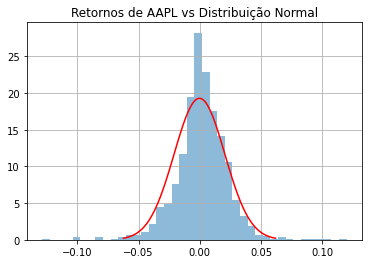

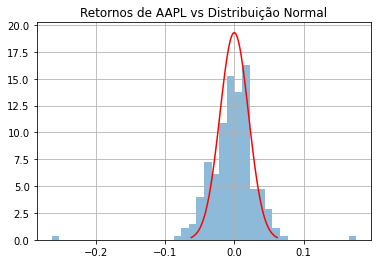

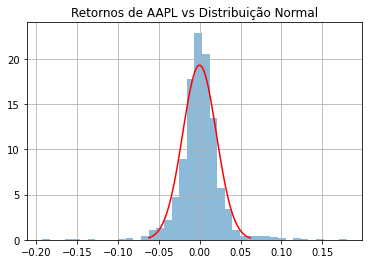

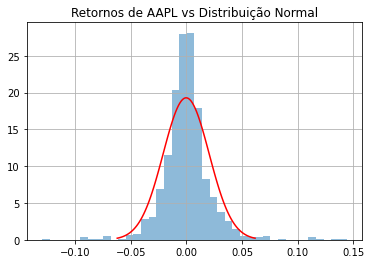

In [8]:
# importando alguns pacotes a mais
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Checagem feita para cada ativo
def comparacao(ticker):
    retornos[ticker].hist(bins=40, density=True, histtype="stepfilled", alpha=0.5)
    x = np.linspace(med_port - 3*port_dp, med_port +3*port_dp,100)
    plt.plot(x, scipy.stats.norm.pdf(x, med_port, port_dp), "r")
    plt.title("Retornos de AAPL vs Distribuição Normal")
    plt.show()
    
comparacao('AAPL')
comparacao('FB')
comparacao('C')
comparacao('DIS')